# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [30]:
# leemos el fichero csv
df_datos <- read.csv("datos/BCSC_risk_factors_summarized.csv", sep = ",", header = T)
head(df_datos)

# replicamos las filas según el campo count indique
df_datos_rep <- df_datos[rep(row.names(df_datos), df_datos$count),]

year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
2000,1,1,0,0,0,1,0,1,3,0,0,1
2000,1,1,0,0,1,3,0,1,2,0,0,1
2000,1,1,0,0,1,4,0,1,1,0,0,2
2000,1,1,0,0,2,3,0,1,1,0,0,1
2000,1,1,0,0,2,3,0,1,1,1,9,1
2000,1,1,0,0,4,9,0,1,1,0,0,1


El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [31]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
df_muestra <- df_datos_rep[sample(nrow(df_datos_rep), 5000), ]
nrow(df_muestra)
head(df_muestra)

[1] 5000

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,9,9,9,9,2,9,2,9,0,0,218
986739.194,2008,7,2,0,9,9,2,0,2,9,0,0,771
845393.799,2007,5,1,0,9,9,2,0,1,9,0,0,877
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0,32
481428.71,2004,3,1,0,9,9,3,0,1,2,0,0,97
169906.1,2001,6,5,0,9,9,1,1,2,3,0,0,11


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [32]:
# Definimos las columnas que nos interesan
cols <- c(
    "race_eth", 
    "first_degree_hx", 
    "age_menarche", 
    "age_first_birth", 
    "BIRADS_breast_density", 
    "current_hrt", 
    "menopaus", 
    "bmi_group", 
    "biophx", 
    "breast_cancer_history")

for (col in cols) {
    # cambiamos los 9 por NA
    df_muestra[df_muestra[col] == 9, col] <- NA
}

# Etiquetamos todas las columnas que solo tengan estos 3 valores: 0 = No; 1 = Sí; 9 = Desconocido
df_muestra[, "first_degree_hx"] <- factor(df_muestra[, "first_degree_hx"], labels=c("NO", "SI"))
df_muestra[, "current_hrt"] <- factor(df_muestra[, "current_hrt"], labels=c("NO", "SI"))
df_muestra[, "biophx"] <- factor(df_muestra[, "biophx"], labels=c("NO", "SI"))
df_muestra[, "breast_cancer_history"] <- factor(df_muestra[, "breast_cancer_history"], labels=c("NO", "SI"))

df_muestra[, "BIRADS_breast_density"] <- factor(df_muestra[, "BIRADS_breast_density"], labels=c("Almost entirely fat", "Scattered fibroglandular densities", "Heterogeneously dense", "Extremely dense"))
df_muestra[, "race_eth"] <- factor(df_muestra[, "race_eth"], labels = c("Non-Hispanic white", "Non-Hispanic black", "Asian/Pacific Islander", "Native American", "Hispanic", "Other/mixed"))
df_muestra[, "menopaus"] <- factor(df_muestra[, "menopaus"], labels = c("Pre- or peri-menopausal", "Post-menopausal", "Surgical menopause"))
df_muestra[, "age_menarche"] <- factor(df_muestra[, "age_menarche"], labels = c("Edad ≥14", "Edad 12-13", "Edad <12"))
df_muestra[, "age_first_birth"] <- factor(df_muestra[, "age_first_birth"], labels = c("Edad < 20", "Edad 20-24", "Edad 25-29", "Edad ≥30", "Nulliparous"))
df_muestra[, "bmi_group"] <- factor(df_muestra[, "bmi_group"], labels = c("10-24.99", "25-29.99", "30-34.99", "35 or more"))

#head(df_muestra)
str(df_muestra)

'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : Factor w/ 6 levels "Non-Hispanic white",..: NA 2 1 1 1 5 1 NA NA 1 ...
 $ first_degree_hx      : Factor w/ 2 levels "NO","SI": NA 1 1 2 1 1 1 NA 1 NA ...
 $ age_menarche         : Factor w/ 3 levels "Edad ≥14","Edad 12-13",..: NA NA NA 2 NA NA NA NA NA 3 ...
 $ age_first_birth      : Factor w/ 5 levels "Edad < 20","Edad 20-24",..: NA NA NA 2 NA NA NA NA 2 NA ...
 $ BIRADS_breast_density: Factor w/ 4 levels "Almost entirely fat",..: 2 2 2 2 3 1 NA NA 1 2 ...
 $ current_hrt          : Factor w/ 2 levels "NO","SI": NA 1 1 1 1 2 1 NA 1 1 ...
 $ menopaus             : Factor w/ 3 levels "Pre- or peri-menopausal",..: 2 2 1 2 1 2 2 NA 2 2 ...
 $ bmi_group            : Factor w/ 4 levels "10-24.99","25-29.99",..: NA NA NA 2 2 3 2 NA NA 2 ...
 $ biophx               : Factor w/ 2 levels "

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [33]:
# Creamos un vector con la media de las edades de los rangos, coincidendo el indice con el valor asociado al rango
ageVector<-c(24,32,37,42,47,52,57,62,67,72,77,82,87)

# Creamos la nueva columna con la media de edad asociada a cada rango
df_muestra$mean_age<-ageVector[as.numeric(df_muestra$age_group_5_years)]
head(df_muestra)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,mean_age
792997.89,2006,8,NA,NA,NA,NA,Scattered fibroglandular densities,NA,Post-menopausal,NA,NO,NO,218,62
986739.194,2008,7,Non-Hispanic black,NO,NA,NA,Scattered fibroglandular densities,NO,Post-menopausal,NA,NO,NO,771,57
845393.799,2007,5,Non-Hispanic white,NO,NA,NA,Scattered fibroglandular densities,NO,Pre- or peri-menopausal,NA,NO,NO,877,47
996805.11,2008,8,Non-Hispanic white,SI,Edad 12-13,Edad 20-24,Scattered fibroglandular densities,NO,Post-menopausal,25-29.99,NO,NO,32,62
481428.71,2004,3,Non-Hispanic white,NO,NA,NA,Heterogeneously dense,NO,Pre- or peri-menopausal,25-29.99,NO,NO,97,37
169906.1,2001,6,Hispanic,NO,NA,NA,Almost entirely fat,SI,Post-menopausal,30-34.99,NO,NO,11,52


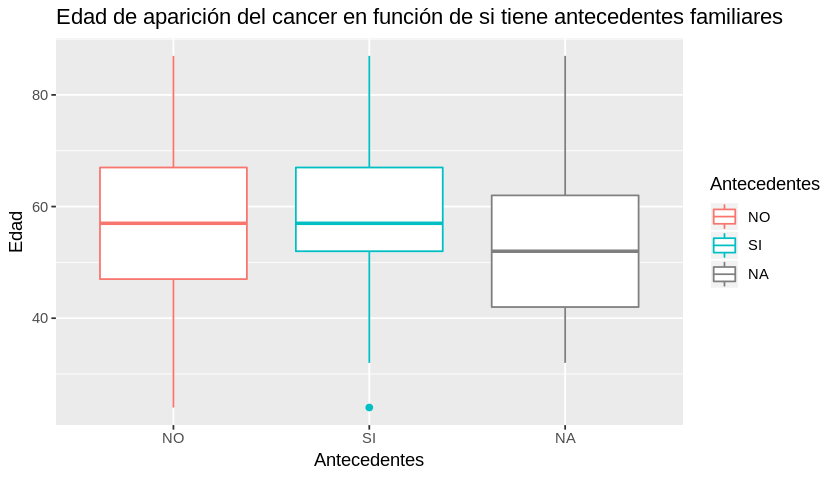

In [38]:
# cargamos la librería ggplot y cambiamos las opciones para generar gráficos algo mas pequeños
library("ggplot2")
options(repr.plot.height=4,repr.plot.width=7)

# mostramos el diagrama de cajas
ggplot(data = df_muestra, aes(x = first_degree_hx, y = mean_age, color = first_degree_hx)) + 
  geom_boxplot(na.rm = T) +
  scale_color_discrete(name = "Antecedentes") + 
  xlab("Antecedentes")+
  ylab("Edad") +
  ggtitle("Edad de aparición del cancer en función de si tiene antecedentes familiares")

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [39]:
# Realizamos el test de shapiro para ver si la edad estimada en función de si se tienen antecendentes
# siguen una distribución normal
shapiro.test(df_muestra$mean_age[df_muestra$first_degree_hx == "SI"])$p.value
shapiro.test(df_muestra$mean_age[df_muestra$first_degree_hx == "NO"])$p.value

[1] 4.480875e-11

[1] 4.540829e-31

In [40]:
# Saphiro da valores muy bajos, por lo que descartamos que sea una distribución normal
# Voy a optar por el test de Wilcoxon-Mann-Whitney 
wilcox.test(mean_age ~ first_degree_hx, data = df_muestra)


	Wilcoxon rank sum test with continuity correction

data:  mean_age by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


El **p valor nos da un valor muy bajo**, por lo tanto, podemos asumir que la edad de aparicion del cancer es independiente a los antecedentes familiares.

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

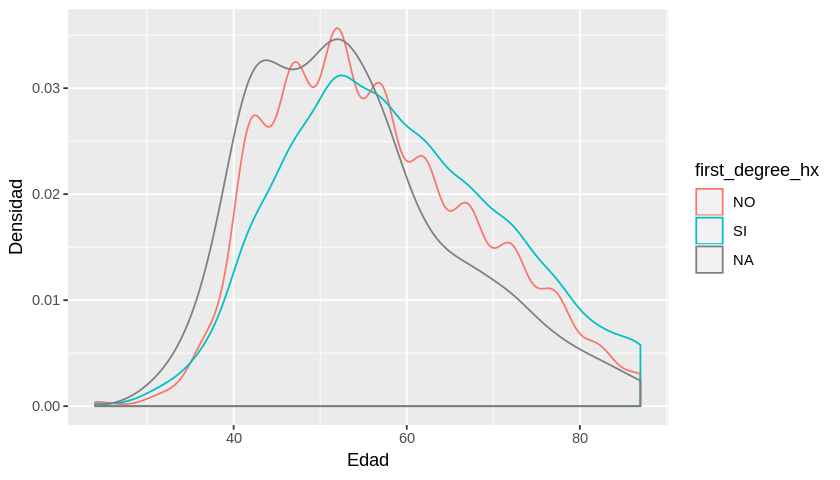

In [42]:
ggplot(df_muestra, aes(x = mean_age, group = first_degree_hx, color = first_degree_hx)) + 
  geom_density() +
  xlab("Edad") +
  ylab("Densidad")

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

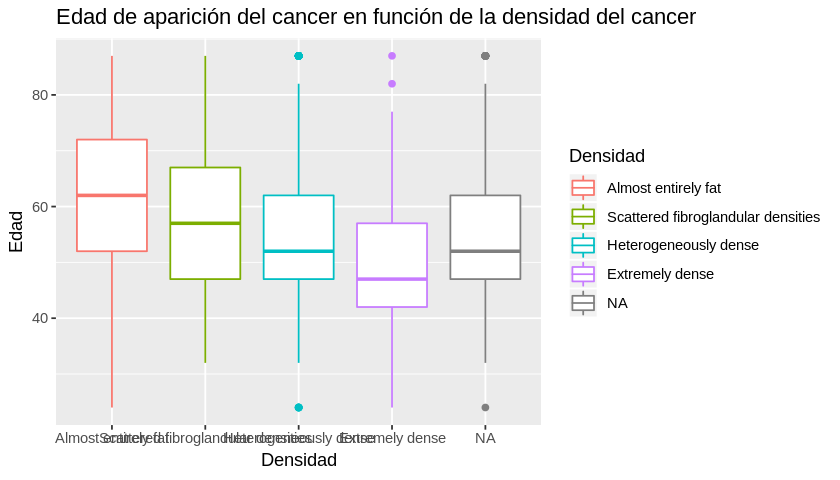

In [45]:
# mostramos el diagrama de cajas
ggplot(data = df_muestra, aes(x = BIRADS_breast_density, y = mean_age, color = BIRADS_breast_density)) + 
  geom_boxplot(na.rm = T) +
  scale_color_discrete(name = "Densidad") + 
  xlab("Densidad")+
  ylab("Edad") +
  ggtitle("Edad de aparición del cancer en función de la densidad del cancer")

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [59]:
# Por el gráfico parece que si que la edad puede afectar a la densidad del cancer, pero vamos a hacer el test.

# para cada tipo de densidad miramos si sigue una distribución gausiana
# Para cadas tipo de densidad: calculo el p.value de shapiro y lo imprimo
levels(df_muestra$BIRADS_breast_density)

tipo <- 'Almost entirely fat'
t <- shapiro.test(df_muestra[df_muestra$BIRADS_breast_density == tipo,]$mean_age)
paste("Para el tipo", tipo, "el p.value del shapiro test es", t$p.value)

tipo <- 'Scattered fibroglandular densities'
t <- shapiro.test(df_muestra[df_muestra$BIRADS_breast_density == tipo,]$mean_age)
paste("Para el tipo", tipo, "el p.value del shapiro test es", t$p.value)

tipo <- 'Heterogeneously dense'
t <- shapiro.test(df_muestra[df_muestra$BIRADS_breast_density == tipo,]$mean_age)
paste("Para el tipo", tipo, "el p.value del shapiro test es", t$p.value)

tipo <- 'Extremely dense'
t <- shapiro.test(df_muestra[df_muestra$BIRADS_breast_density == tipo,]$mean_age)
paste("Para el tipo", tipo, "el p.value del shapiro test es", t$p.value)

[1] "Almost entirely fat"                "Scattered fibroglandular densities"
[3] "Heterogeneously dense"              "Extremely dense"

[1] "Para el tipo Almost entirely fat el p.value del shapiro test es 0.000151865852273701"

[1] "Para el tipo Scattered fibroglandular densities el p.value del shapiro test es 4.7377089605984e-20"

[1] "Para el tipo Heterogeneously dense el p.value del shapiro test es 1.2162989002878e-20"

[1] "Para el tipo Extremely dense el p.value del shapiro test es 2.89718130439785e-09"

Todos **los p.value de los test de Shapiro son muy bajos** por lo que no podemos asumir distribucines normales.
Tenemos que comparar medias entre diferentes tipo de densidad. Como no tenemos unas distribuciones gaussianas utilizaremos el test de Kruskal

In [60]:
kruskal.test(mean_age ~ BIRADS_breast_density, data = df_muestra)


	Kruskal-Wallis rank sum test

data:  mean_age by BIRADS_breast_density
Kruskal-Wallis chi-squared = 156.19, df = 3, p-value < 2.2e-16


Con un **p.valor tan bajo parece que no hay una dependencia directa entre la densidad del cancer y la edad a la que se diagnostica**

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [61]:
f_BIRADS <- table(df_muestra$BIRADS_breast_density)
f_BIRADS


               Almost entirely fat Scattered fibroglandular densities 
                               297                               1665 
             Heterogeneously dense                    Extremely dense 
                              1451                                256 

A simple vista se ven que no son igual de probable, pero voy a pasar el test de Chi cuadrado a los datos

In [65]:
chisq.test(f_BIRADS)


	Chi-squared test for given probabilities

data:  f_BIRADS
X-squared = 1816.3, df = 3, p-value < 2.2e-16


El p.value es muy muy pequeño, por lo que se puede decir que no son igual de probables 

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [70]:
probabilidades <- prop.table(f_BIRADS)
probabilidades
paste("El mas probable es el Scattered fibroglandular densities:", round(prob[2] * 100, 2),"%")


               Almost entirely fat Scattered fibroglandular densities 
                        0.08094849                         0.45380213 
             Heterogeneously dense                    Extremely dense 
                        0.39547561                         0.06977378 

[1] "El mas probable es el Scattered fibroglandular densities: 45.38 %"

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [74]:
f_BIRADS_first_degree_hx <- table(df_muestra$first_degree_hx, df_muestra$BIRADS_breast_density)
f_BIRADS_first_degree_hx

chisq.test(f_BIRADS_first_degree_hx)

    
     Almost entirely fat Scattered fibroglandular densities
  NO                 223                               1324
  SI                  56                                248
    
     Heterogeneously dense Extremely dense
  NO                  1135             190
  SI                   229              45


	Pearson's Chi-squared test

data:  f_BIRADS_first_degree_hx
X-squared = 4.2475, df = 3, p-value = 0.236


El valor de p-value de 0.236 indica que podemos aceptar la hipotesis nula, por lo que podemos decir que no hay dependencia entre el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares.

¿Depende el tipo de cancer BIRADS del grupo étnico?

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA